In [1]:
import numpy as np 
import pandas as pd 
from random import randrange as rand
from matplotlib import pyplot as plt

In [2]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
# Preprocess the data
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

In [4]:
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

In [5]:
print("X_train" , X_train.shape)
print("X_test" , X_test.shape)
print("Y_train" , Y_train.shape)
print("Y_test" , Y_test.shape)

X_train (784, 60000)
X_test (784, 10000)
Y_train (60000,)
Y_test (10000,)


In [6]:
current_image = X_train[:, 5, None]

In [7]:
current_image.shape

(784, 1)

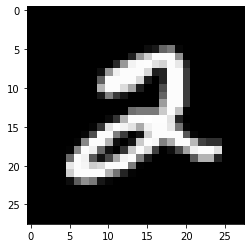

In [8]:
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return np.multiply(sigmoid(x),(1-sigmoid(x)))

In [10]:
# Test the sigmoid function
x = np.array([-1, 0, 1])
# Calculated the output using sigmaid calculator and it was [0.19661193, 0.25, 0.19661193]
#let's see what our fuction returns 
print("Expected output = 0.26894142, 0.5, 0.73105858")
sig = sigmoid(x)
print(sig)

Expected output = 0.26894142, 0.5, 0.73105858
[0.26894142 0.5        0.73105858]


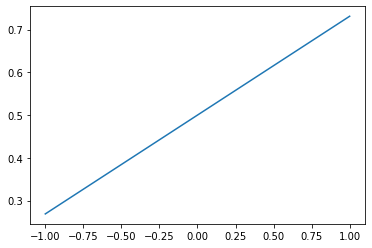

In [11]:
plt.plot(x, sig)
plt.show()

In [12]:
# Test the sigmoid_backward function
dout = np.array([1, 1, 1])
print("Expected output = 0.19661193, 0.25, 0.19661193")
print(sigmoid_derivative(x)) 

Expected output = 0.19661193, 0.25, 0.19661193
[0.19661193 0.25       0.19661193]


In [13]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(Z):
    return Z > 0

def relu_backward(dout, x):
    dx = dout.copy()
    dx[x <= 0] = 0
    return dx

In [14]:
# Test the relu function
x = np.array([-1, 0, 1])
print("Expected output = 0, 0, 1]")
re = relu(x)
print(re) 

Expected output = 0, 0, 1]
[0 0 1]


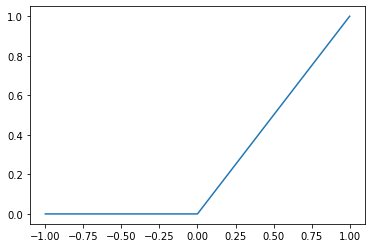

In [15]:
plt.plot(x, re)
plt.show()

In [16]:
# Test the relu_backward function
dout = np.array([1, 1, 1])
print("Expected output = 0, 0, 1]")
print(relu_backward(dout, x)) 

Expected output = 0, 0, 1]
[0 0 1]


In [17]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [18]:
def derivative_of_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

In [19]:
x = np.array([[1, 2, 3], [1, 2, 3]])
print("Expected output = [0.09003057, 0.24472847, 0.66524096], [0.09003057, 0.24472847, 0.66524096]")
print(softmax(x))
prob_sum = 0.09003057 + 0.24472847 + 0.66524096
print(prob_sum)

Expected output = [0.09003057, 0.24472847, 0.66524096], [0.09003057, 0.24472847, 0.66524096]
[[0.5 0.5 0.5]
 [0.5 0.5 0.5]]
1.0


In [20]:
def dropout(x, p):
    if p < 1:
        mask = np.random.binomial(1, p, size=x.shape) / p
        x *= mask
    return x

In [21]:
# Test the relu function with dropout layer
x = np.array([-1.0, 0.0, 1.0])
y = relu(x)
y = dropout(y, p=0.5)
print(y) 

[0. 0. 0.]


In [22]:
# Test the sigmoid function with dropout layer
x = np.array([-1.0, 0.0, 1.0])
y = sigmoid(x)
y = dropout(y, p=0.5)
print(y) 

[0. 0. 0.]


In [23]:
# Define the model
input_size = 784  # 28x28 input size
hidden_size = 50  # Number of hidden units
output_size = 10  # 10 output classes
num_of_classes = 10

In [24]:
# Initialize the weights and biases
def parameters():
    W1 = np.random.rand(num_of_classes, input_size) - 0.5
    b1 = np.random.rand(num_of_classes, 1) - 0.5
    W2 = np.random.rand(num_of_classes, output_size) - 0.5
    b2 = np.random.rand(num_of_classes, 1) - 0.5
    return W1, b1, W2, b2 

In [25]:
def one_hot_encoding(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [26]:
def SGD(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [27]:
def gradient_descent(X, Y, alpha, iterations, m):
    W1, b1, W2, b2 = parameters()
    iters = []
    accuracies = []
    wait_for = 5
    max_accuracy = 0.0
    epoch_without_change = 0
    for i in range(iterations):
        m1, n1, m2, n2 = forward_pass(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_pass(m1, n1, m2, n2, W1, W2, X, Y,m)
        W1, b1, W2, b2 = SGD(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = np.argmax(n2, 0)
            accuracy = (np.sum(predictions == Y) / Y.size)
            print(accuracy)
            #Early stopping condition
            if(abs(max_accuracy - accuracy) < 0.02):
                epoch_without_change = epoch_without_change + 1
                if(epoch_without_change == wait_for):
                    iters.append(i)
                    accuracies.append(accuracy)
                    print("Model is not improving at a rapid rate, stopping early")
                    print("Model accuracy is = " , 100 * accuracy)
                    return W1, b1, W2, b2 , iters , accuracies 
            else:
                epoch_without_change = 0
            max_accuracy = accuracy
            iters.append(i)
            accuracies.append(accuracy)
    print("Model accuracy is = " , 100 * accuracy)
    return W1, b1, W2, b2 , iters , accuracies 

**NN with RELU only**

In [28]:
def forward_pass(W1, b1, W2, b2, X):
    m1 = W1.dot(X) + b1
    n1 = relu(m1)
    m2 = W2.dot(n1) + b2
    n2 = softmax(m2)
    return m1, n1, m2, n2


def backward_pass(Z1, A1, Z2, A2, W1, W2, X, Y ,m):
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * relu_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [29]:
alpha = 0.1
m = 60000
iterations = 1000
W1, b1, W2, b2, iters,accuracies = gradient_descent(X_train, Y_train, alpha, iterations , m)

Iteration:  0
0.1073
Iteration:  50
0.30595
Iteration:  100
0.43855
Iteration:  150
0.5768166666666666
Iteration:  200
0.6649333333333334
Iteration:  250
0.7198166666666667
Iteration:  300
0.7571333333333333
Iteration:  350
0.7816166666666666
Iteration:  400
0.8003
Iteration:  450
0.8129833333333333
Iteration:  500
0.8223166666666667
Iteration:  550
0.8299833333333333
Iteration:  600
0.8363
Model is not improving at a rapid rate, stopping early
Model accuracy is =  83.63000000000001


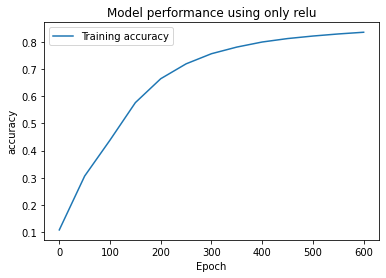

In [30]:
plt.plot(iters, accuracies, label = "Training accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.title("Model performance using only relu")
plt.show()

In [31]:
_, _, _, A2 = forward_pass(W1, b1, W2, b2, X_test)
predictions = np.argmax(A2, 0)
test_accuracy = np.sum(predictions == Y_test) / Y_test.size
print("Accuracy of model on test data is = ",100 * test_accuracy)

Accuracy of model on test data is =  84.58


**NN using Sigmoid Only**

In [32]:
def forward_pass(W1, b1, W2, b2, X):
    m1 = W1.dot(X) + b1
    n1 = sigmoid(m1)
    m2 = W2.dot(n1) + b2
    n2 = softmax(m2)
    return m1, n1, m2, n2


def backward_pass(Z1, A1, Z2, A2, W1, W2, X, Y ,m):
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * sigmoid_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [33]:
alpha = 0.1
m = 60000
iterations = 1000
W1, b1, W2, b2, iters,accuracies = gradient_descent(X_train, Y_train, alpha, iterations , m)

Iteration:  0
0.11346666666666666
Iteration:  50
0.239
Iteration:  100
0.3504333333333333
Iteration:  150
0.4368666666666667
Iteration:  200
0.5083166666666666
Iteration:  250
0.5622333333333334
Iteration:  300
0.6025
Iteration:  350
0.6366833333333334
Iteration:  400
0.66635
Iteration:  450
0.6897166666666666
Iteration:  500
0.7083166666666667
Iteration:  550
0.7236666666666667
Iteration:  600
0.7371
Iteration:  650
0.7485
Iteration:  700
0.7583833333333333
Model is not improving at a rapid rate, stopping early
Model accuracy is =  75.83833333333332


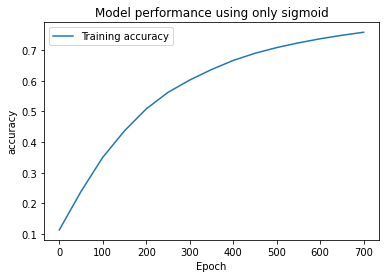

In [34]:
plt.plot(iters, accuracies, label = "Training accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.title("Model performance using only sigmoid")
plt.show()

In [35]:
_, _, _, A2 = forward_pass(W1, b1, W2, b2, X_test)
predictions = np.argmax(A2, 0)
test_accuracy = np.sum(predictions == Y_test) / Y_test.size
print("Accuracy of model on test data is = ",100 * test_accuracy)

Accuracy of model on test data is =  77.03


**NN using relu with dropout layer**

In [36]:
def forward_pass(W1, b1, W2, b2, X):
    m1 = W1.dot(X) + b1
    n1 = relu(m1)
    d = dropout(n1,0.04)
    m2 = W2.dot(d) + b2
    n2 = softmax(m2)
    return m1, n1, m2, n2


def backward_pass(Z1, A1, Z2, A2, W1, W2, X, Y ,m):
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * relu_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [37]:
alpha = 0.10
m = 60000
iterations = 1000
W1, b1, W2, b2, iters,accuracies = gradient_descent(X_train, Y_train, alpha, iterations , m)

Iteration:  0
0.1091
Iteration:  50
0.11443333333333333
Iteration:  100
0.11431666666666666
Iteration:  150
0.1151
Iteration:  200
0.1146
Iteration:  250
0.11646666666666666
Model is not improving at a rapid rate, stopping early
Model accuracy is =  11.646666666666667


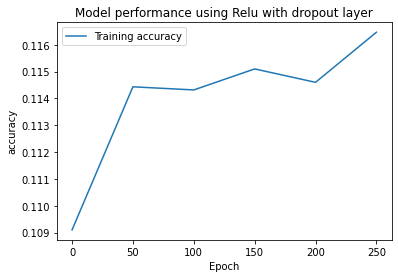

In [38]:
plt.plot(iters, accuracies, label = "Training accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.title("Model performance using Relu with dropout layer")
plt.show()

In [39]:
_, _, _, A2 = forward_pass(W1, b1, W2, b2, X_test)
predictions = np.argmax(A2, 0)
test_accuracy = np.sum(predictions == Y_test) / Y_test.size
print("Accuracy of model on test data is = ",100 * test_accuracy)

Accuracy of model on test data is =  11.17


**NN using Sigmoid with dropout layer**

In [40]:
def forward_pass(W1, b1, W2, b2, X):
    m1 = W1.dot(X) + b1
    n1 = sigmoid(m1)
    d = dropout(n1,0.4)
    m2 = W2.dot(d) + b2
    n2 = softmax(m2)
    return m1, n1, m2, n2


def backward_pass(Z1, A1, Z2, A2, W1, W2, X, Y ,m):
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * sigmoid_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [41]:
alpha = 0.10
m = 60000
iterations = 1000
W1, b1, W2, b2, iters,accuracies = gradient_descent(X_train, Y_train, alpha, iterations , m)

Iteration:  0
0.0957
Iteration:  50
0.14425
Iteration:  100
0.19421666666666668
Iteration:  150
0.22485
Iteration:  200
0.24768333333333334
Iteration:  250
0.2616
Iteration:  300
0.2696
Iteration:  350
0.27576666666666666
Iteration:  400
0.2841
Iteration:  450
0.28895
Model is not improving at a rapid rate, stopping early
Model accuracy is =  28.895


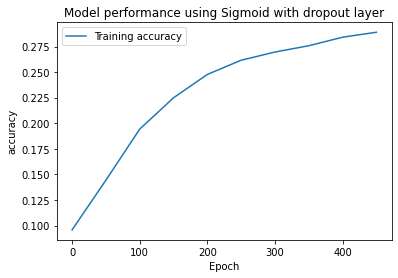

In [42]:
plt.plot(iters, accuracies, label = "Training accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.title("Model performance using Sigmoid with dropout layer")
plt.show()

In [43]:
_, _, _, A2 = forward_pass(W1, b1, W2, b2, X_test)
predictions = np.argmax(A2, 0)
test_accuracy = np.sum(predictions == Y_test) / Y_test.size
print("Accuracy of model on test data is = ",100 * test_accuracy)

Accuracy of model on test data is =  29.67
